<a href="https://colab.research.google.com/github/Saha-Manav/Lung-Cancer-Classification-Research-/blob/main/LC_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import shutil
import matplotlib.pyplot as plt

In [ ]:
# Define constants and paths
train_dir = '/content/drive/MyDrive/Lung Cancer ML Project/LIDC dataset/train'
val_dir = '/content/drive/MyDrive/Lung Cancer ML Project/LIDC dataset/validation'
test_dir = '/content/drive/MyDrive/Lung Cancer ML Project/LIDC dataset/test'

batch_size = 32
img_height = 128
img_width = 128
num_classes = 2


In [ ]:
# Data augmentation and rescaling for training, validation, and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5197 images belonging to 2 classes.
Found 1297 images belonging to 2 classes.
Found 1622 images belonging to 2 classes.


In [ ]:
# Load MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=10,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8549 - loss: 0.3994
Epoch 1: val_loss improved from inf to 0.31334, saving model to best_model.keras
162/162 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.8550 - loss: 0.3991 - val_accuracy: 0.8781 - val_loss: 0.3133
Epoch 2/10
  1/162 ━━━━━━━━━━━━━━━━━━━━ 51s 321ms/step - accuracy: 0.8438 - loss: 0.3784

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 0.31334
162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.8438 - loss: 0.3784 - val_accuracy: 0.7647 - val_loss: 0.6163
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9064 - loss: 0.2553
Epoch 3: val_loss did not improve from 0.31334
162/162 ━━━━━━━━━━━━━━━━━━━━ 143s 527ms/step - accuracy: 0.9064 - loss: 0.2554 - val_accuracy: 0.8711 - val_loss: 0.3384
Epoch 4/10
  1/162 ━━━━━━━━━━━━━━━━━━━━ 47s 297ms/step - accuracy: 0.9375 - loss: 0.1833
Epoch 4: val_loss improved from 0.31334 to 0.13707, saving model to best_model.keras
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9375 - loss: 0.1833 - val_accuracy: 0.9412 - val_loss: 0.1371
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9045 - loss: 0.2355
Epoch 5: val_loss did not improve from 0.13707
162/162 ━━━━━━━━━━━━━━━━━━━━ 141s 531ms/step - accuracy: 0.9046 - loss: 0.2355 - val_accuracy: 0.8742 - val_loss: 0.3446
Epoch 6/10
  1/162 ━━━━━━━━━━

In [ ]:
# Load the best model
model.load_weights('best_model.keras')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')


50/50 ━━━━━━━━━━━━━━━━━━━━ 373s 8s/step - accuracy: 0.9724 - loss: 0.1108
Test accuracy: 0.9038


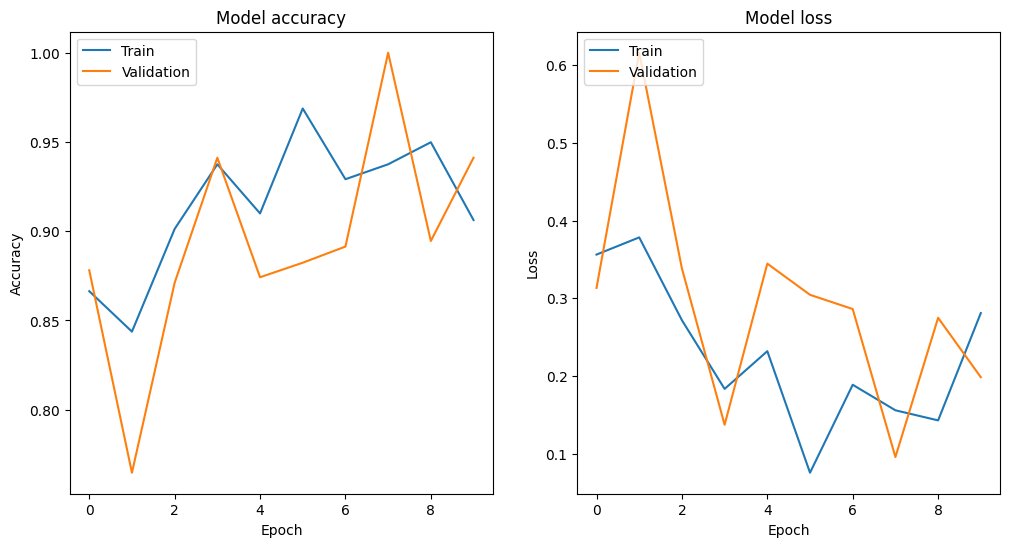

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the model
model.save('mobilenetv2_lung_cancer.keras')


51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 448ms/step


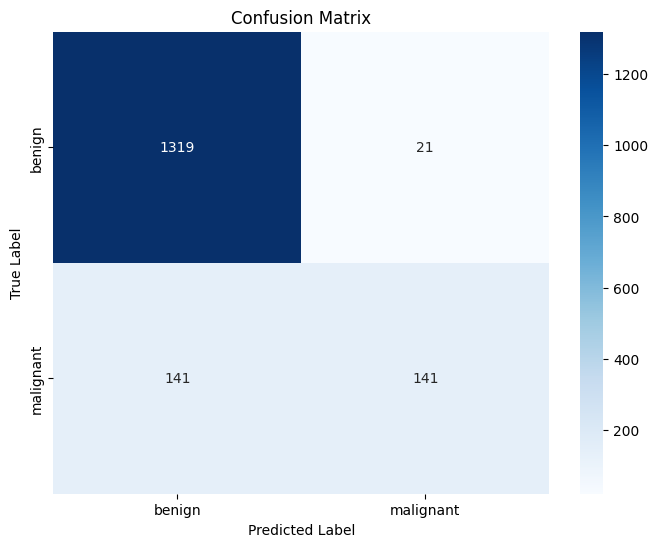

Classification Report:
              precision    recall  f1-score   support

      benign       0.90      0.98      0.94      1340
   malignant       0.87      0.50      0.64       282

    accuracy                           0.90      1622
   macro avg       0.89      0.74      0.79      1622
weighted avg       0.90      0.90      0.89      1622



In [ ]:
# Predictions and metrics
test_predictions = model.predict(test_generator)
test_true = test_generator.classes
test_pred_labels = np.argmax(test_predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_true, test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(test_true, test_pred_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)
